In [1]:
filename = "crawldata/en-mk.deduped.txt"

import pandas as pd
df = pd.read_csv(filename, sep="\t",
             nrows=1200000,
             error_bad_lines=False,
             warn_bad_lines=False
).iloc[:, [0,2]]

df.columns=["url", "text"]
df.head()

,url,text
0,http://iph.mk/en/september-29-world-heart-day-...,September 29 – WORLD HEART DAY 2016
1,https://www.sobranie.mk/2020-2024-delegations-...,DELEGATION TO THE PARLIAMENTARY ASSEMBLY OF TH...
2,https://eprints.ugd.edu.mk/22396/,Together with development and introduction of ...
3,http://fbe.edu.mk/index.php?option=com_content...,Depending on the demonstrated quality (depth a...
4,https://www.euroimpex.com.mk/eng/news-2008-201...,Victory for the Peugeot brand at the competiti...


In [2]:
s = df.groupby("url")["text"].apply(" ".join)

In [3]:
from utils import load_lexicon, get_variant, count_variants

lex = load_lexicon()

df = pd.DataFrame(s)
df["variant"] = df.text.apply(lambda s: get_variant(s, lex=lex))
df["length"] = df.text.apply(len)
df["per_token"] = df.text.apply(lambda s: count_variants(s, lex)[1])

import parse
def get_domain(url:str) -> str:
    pattern = "{protocol}://{domain}/{rest}"
    p = parse.compile(pattern)
    modified_pattern = "{protocol}://{domain}/"
    mp = parse.compile(modified_pattern)
    try:
        parse_result = p.parse(url)
        domain = parse_result["domain"]
    except TypeError:
        parse_result = mp.parse(url)
        domain = parse_result["domain"]
    return domain

df["domain"] = [get_domain(url) for url in df.index.values]

df = df.loc[df.variant.isin(["A", "B"]), :]

In [4]:
gb = df.groupby("domain").count()
suitable_domains = gb.loc[gb.text >= 3, :].index
suitable_domains

Index(['100procenta.info', '2018.iffs.mk', '2020.iffs.mk', '3dhub.mk',
       '6maj.mk', 'abopharma.info', 'accelerator.ukim.mk',
       'acibademsistina.mk', 'acimacedonia.mk', 'addons.mozilla.org',
       ...
       'zdruzenska.org.mk', 'zds.mk', 'zec.mk', 'zetamacedonia.com',
       'zikol.com.mk', 'ziminibottles.125mb.com', 'zk.mk',
       'zlostorstvaodomraza.com', 'zmc.mk', 'znm.org.mk'],
      dtype='object', name='domain', length=1166)

In [5]:
subset_df = df.loc[df.domain.isin(suitable_domains), :]
subset_df.head(10)

,text,variant,length,per_token,domain
url,,,,,
http://6maj.mk/Dealer.aspx?d=385&language=2,DERPROSA is a manufacturer of bi-axially orien...,B,139,"{'labelling': {'variant': 'B', 'count': 1}}",6maj.mk
http://6maj.mk/Dealer.aspx?d=398&language=2,In 1974 OVIT entered the graphic market and si...,B,375,"{'colour': {'variant': 'B', 'count': 1}}",6maj.mk
http://6maj.mk/Dealer.aspx?d=78&language=2,"From flyers to business reports, from magazine...",B,1441,"{'personalised': {'variant': 'B', 'count': 1},...",6maj.mk
http://acimacedonia.mk/eng/,"Ability to manage the emotional situation, sup...",A,3883,"{'analyze': {'variant': 'A', 'count': 1}}",acimacedonia.mk
http://acimacedonia.mk/uncategorised-en/features-and-potential-of-crypto-currencies-with-special-review-on-bitcoin-magazine-economy-and-business/,The method of providing security of transactio...,A,4530,"{'centers': {'variant': 'A', 'count': 1}}",acimacedonia.mk
http://acimacedonia.mk/uncategorised-en/psychology-in-foreign-currency-trading-magazine-economy-and-business/,It is necessary to examine the steps all the t...,A,3758,"{'favorable': {'variant': 'A', 'count': 1}}",acimacedonia.mk
http://aeroclubskopje.aeroclub.mk/en/fleet/airplanes/,"Through its history, Air Club Skopje used thre...",A,3932,"{'defense': {'variant': 'A', 'count': 1}, 'air...",aeroclubskopje.aeroclub.mk
http://aeroclubskopje.aeroclub.mk/en/services/event-organization/teambuilding,Among other activities which can be organized ...,A,257,"{'airplanes': {'variant': 'A', 'count': 1}}",aeroclubskopje.aeroclub.mk
http://aeroclubskopje.aeroclub.mk/en/services/training-center/,Training Center AKS Skopje owns a Certificate ...,A,1134,"{'center': {'variant': 'A', 'count': 2}}",aeroclubskopje.aeroclub.mk


In [6]:
subset_df["y_true"] = subset_df.variant.copy()
subset_df.head()

<ipython-input-6-355f86c1bf2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["y_true"] = subset_df.variant.copy()


,text,variant,length,per_token,domain,y_true
url,,,,,,
http://6maj.mk/Dealer.aspx?d=385&language=2,DERPROSA is a manufacturer of bi-axially orien...,B,139,"{'labelling': {'variant': 'B', 'count': 1}}",6maj.mk,B
http://6maj.mk/Dealer.aspx?d=398&language=2,In 1974 OVIT entered the graphic market and si...,B,375,"{'colour': {'variant': 'B', 'count': 1}}",6maj.mk,B
http://6maj.mk/Dealer.aspx?d=78&language=2,"From flyers to business reports, from magazine...",B,1441,"{'personalised': {'variant': 'B', 'count': 1},...",6maj.mk,B
http://acimacedonia.mk/eng/,"Ability to manage the emotional situation, sup...",A,3883,"{'analyze': {'variant': 'A', 'count': 1}}",acimacedonia.mk,A
http://acimacedonia.mk/uncategorised-en/features-and-potential-of-crypto-currencies-with-special-review-on-bitcoin-magazine-economy-and-business/,The method of providing security of transactio...,A,4530,"{'centers': {'variant': 'A', 'count': 1}}",acimacedonia.mk,A


In [7]:
ss = subset_df.groupby("domain")["variant"].agg(lambda x:x.value_counts().index[0])

In [8]:
ss[ss.index=="6maj.mk"]

domain
6maj.mk    B
Name: variant, dtype: object

In [9]:
left = subset_df[["y_true", "domain"]]
left = left.set_index("domain")
left["y_pred"] = [ss[ss.index==domain].values[0] for domain in left.index]

left.head()

,y_true,y_pred
domain,,
6maj.mk,B,B
6maj.mk,B,B
6maj.mk,B,B
acimacedonia.mk,A,A
acimacedonia.mk,A,A


In [10]:
left.loc[left.y_true!=left.y_pred, :]

,y_true,y_pred
domain,,
aibest.org,B,A
alka.mk,B,A
alka.mk,B,A
alka.mk,B,A
ananija.mk,A,B
...,...,...
zk.mk,B,A
zk.mk,B,A
zmc.mk,B,A


In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(left.y_true, left.y_pred, labels=["A", "B"])
cm

array([[14451,  1961],
       [ 3441,  5356]])

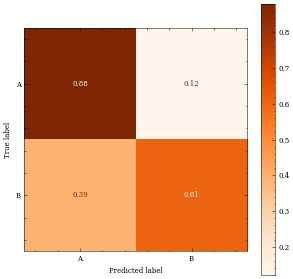

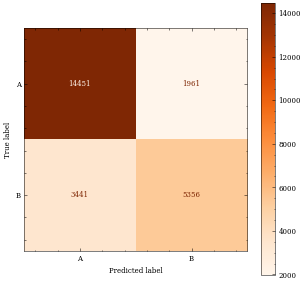

In [34]:
import matplotlib.pyplot as plt

plt.style.use("science,no-latex".split(","))

fig, ax = plt.subplots(figsize=(5,5))
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay.from_predictions(left.y_true, left.y_pred, labels=["A", "B"], cmap="Oranges", ax=ax, normalize="true")

plt.savefig("images/9_cm_normalize_true.png", dpi=400)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay.from_predictions(left.y_true, left.y_pred, labels=["A", "B"], cmap="Oranges", ax=ax, normalize=None)

plt.savefig("images/9_cm_normalize_none.png", dpi=400)
plt.show()

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(left.y_true, left.y_pred)

0.7857114522591138